Data Set Came from Kaggle- https://www.kaggle.com/datasets/mirichoi0218/insurance/data

## Importing Packages

In [182]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

## Importing Data

In [118]:
# the supplied CSV data file is in the directory
insurance_data= pd.read_csv('insurance.csv')

In [119]:
#Calling the info method on insurance_data to see a summary of the data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data appears to have no missing values as all non-null counts are 1338 entriees and all columns have 1338 entries.
All Dtypes appear to represent the data correctly. 

In [120]:
#Call the head method on insurance_data to print the first several rows of the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


All columns have had heading transfered correctly and all data looks organized.

## Determining if their are Duplicates

In [121]:
#determining the number of duplicate rows
print(f"Duplicate rows: {insurance_data.duplicated().sum()}")
#Droping duplicate rows
insurance_data.drop_duplicates(inplace=True)
#insuraning there are no more duplicates
print(f"Duplicate rows: {insurance_data.duplicated().sum()}")

Duplicate rows: 1
Duplicate rows: 0


## Exploring the Data

In [122]:
#To be thought, the missing values will be counted. 
#Using count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#insurance_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Ordering them (increasing or decreasing) using sort_values
#Calling `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([insurance_data.isnull().sum(), 100 * insurance_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


Indeed no missing values are seen. 

In [123]:
#Using insurance_data`s select_dtypes` method to select columns of dtype 'object' to investigate the
#categorical variables
insurance_data.select_dtypes('object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [124]:
#Use pandas' Series method `value_counts` to find number of each regions
insurance_data['region'].value_counts().head()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

It is interesting to note that there are more values from the southeastern region than any other region. 

In [125]:
#Use pandas' Series method `value_counts` to find number of each sex
insurance_data['sex'].value_counts().head()

sex
male      675
female    662
Name: count, dtype: int64

There are more male individuals than female individuals

In [126]:
#Use pandas' Series method `value_counts` to find number of each smoker
insurance_data['smoker'].value_counts().head()

smoker
no     1063
yes     274
Name: count, dtype: int64

Way more individuals are not smokers than smokers. This is not unusual because as of 2022 only 11.6% of people in the united states are smokers. So, it is not surprising to see a low number of people are smokers in out 1338 cases.

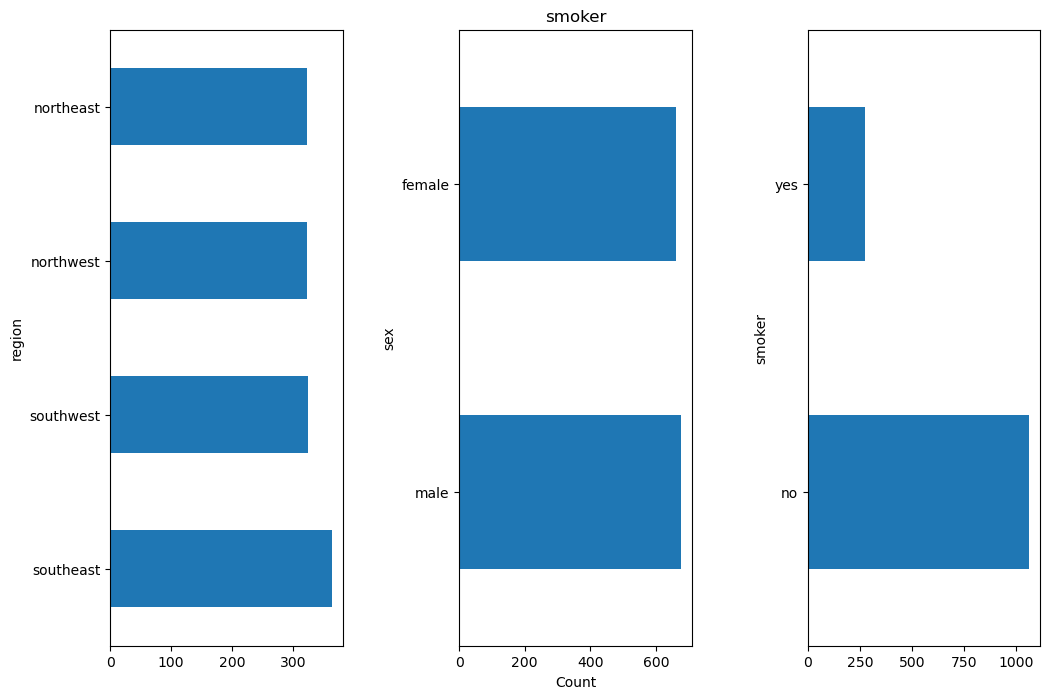

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
insurance_data.region.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title
ax[1].set_title('region')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
insurance_data.sex.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title
ax[1].set_title('sex')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
insurance_data.smoker.value_counts().plot(kind='barh', ax=ax[2])
#Give the plot a helpful title
ax[1].set_title('smoker')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

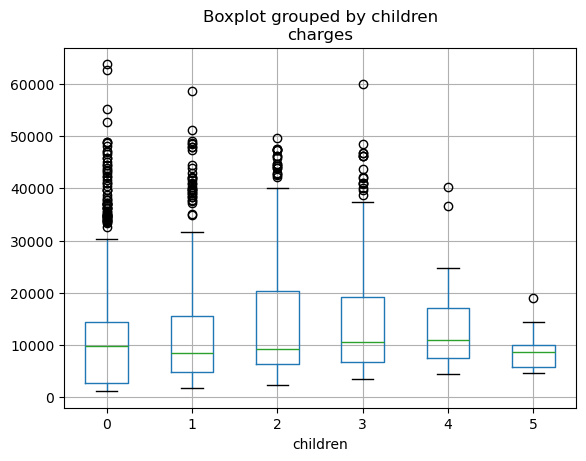

In [128]:
#Looking at the range of data based on number of children
insurance_data.boxplot(column='charges', by='children')

# Display the plot
plt.show()

The Interquartile ranges of each boxplot is based around the same values, but you do see more outliers with those individuals with no children. This maybe those with no children are more able to spend more money on health care.

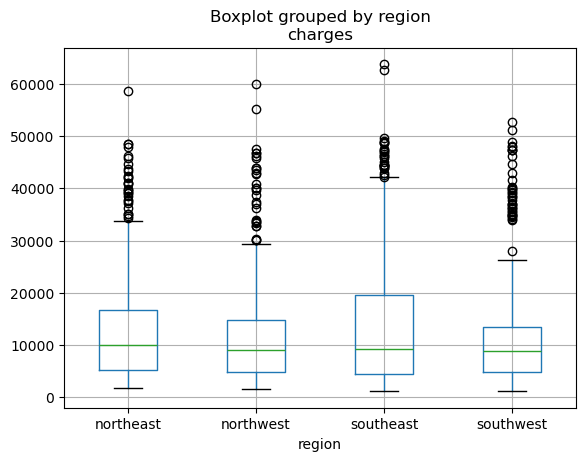

In [129]:
#Looking at the range of data based on number of region
insurance_data.boxplot(column='charges', by='region')

# Display the plot
plt.show()

All values seem to be arranged relatively the same over each region.

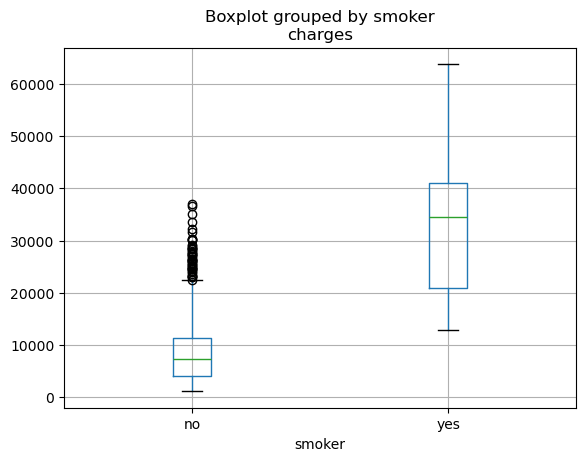

In [130]:
#Looking at the range of data based on number of smoker
insurance_data.boxplot(column='charges', by='smoker')

# Display the plot
plt.show()

The interquartile range of smokers is much higher than non smokers. Although there are outliers of those that are not smokers. This makes sense because smoking leads to more health problems thus increased charges.

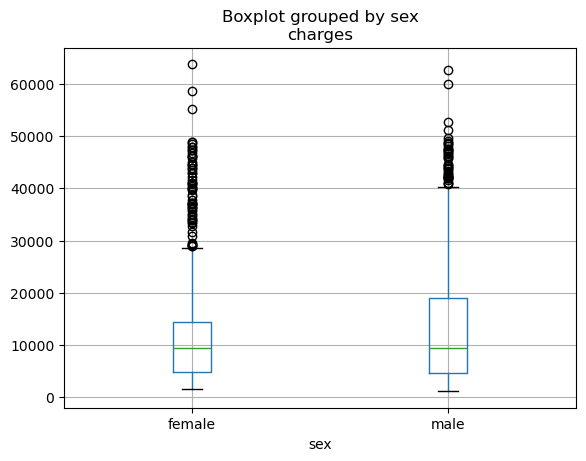

In [131]:
#Looking at the range of data based on number of sex
insurance_data.boxplot(column='charges', by='sex')

# Display the plot
plt.show()

There does not appear to be a difference based on sex. 

In [132]:
#describeing charges data
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


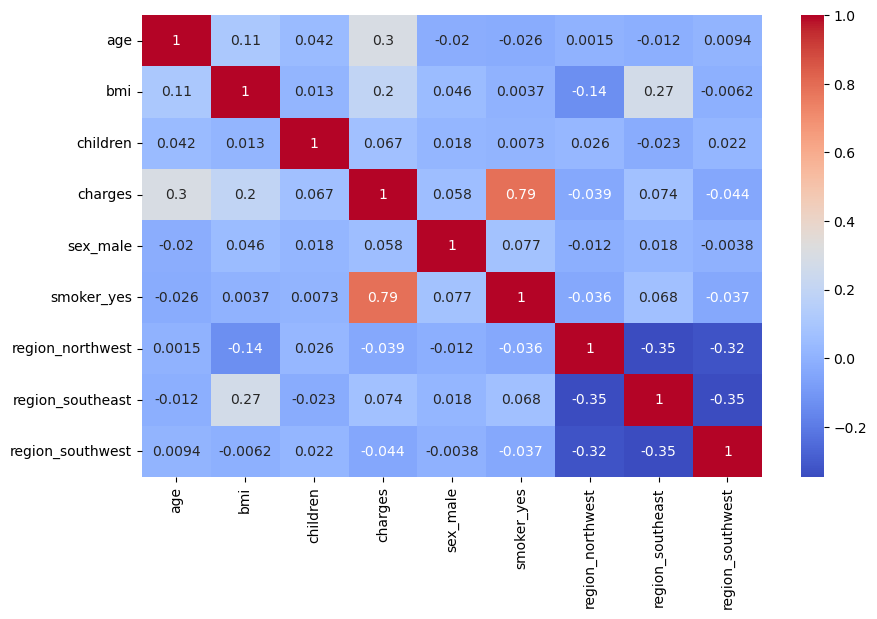

In [133]:
#creating a heatmap to understand correlation of each
#Creating bool's for the vairables such that I can create a heatmap.
insurance_data_B = pd.get_dummies(insurance_data, drop_first=True)
plt.figure(figsize=(10, 6))
sns.heatmap(insurance_data_B.corr(), annot=True, cmap='coolwarm')  # Correlation heatmap
plt.show()

Heatmap appears to show the greatest correlation is between if the individual is a smoker or not. This correlates with the boxplot seen before. 

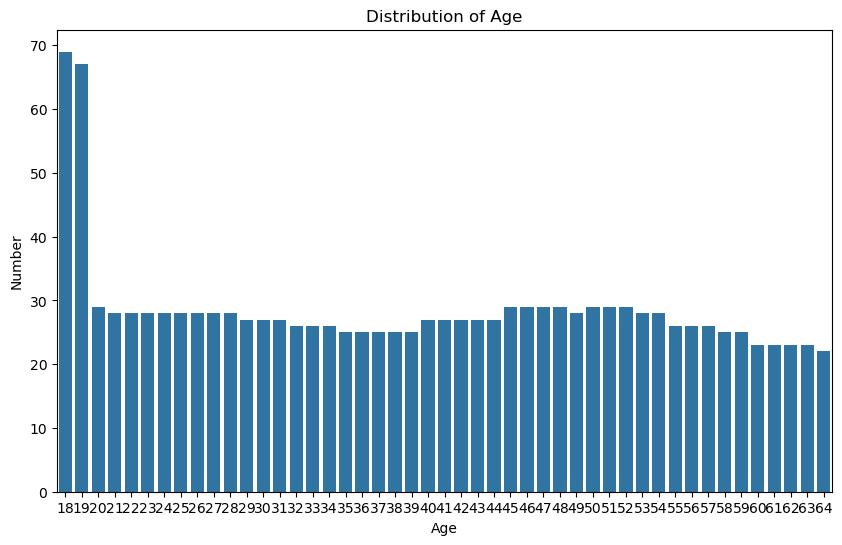

In [134]:
#Creating bargraph the number of individuals at each age
age_counts = insurance_data['age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Number']

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Number', data=age_counts)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

Data show that most individuals in the data set are 18/19 year olds. 

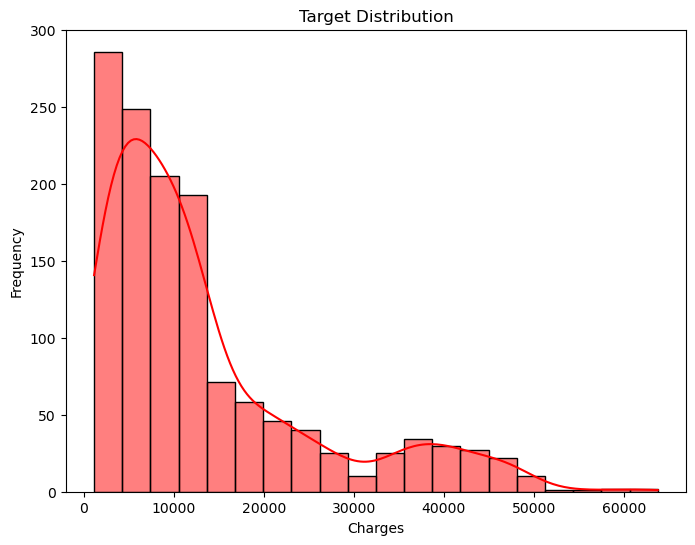

In [135]:
#graphing to show the distribution of the charges
plt.figure(figsize=(8,6))
sns.histplot(insurance_data['charges'],bins=20,color='red',edgecolor='black',kde=True)
plt.title('Target Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Graph shows most of the charges below 12000. 

In [136]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [137]:
# replacing categorical variables with numerical variables
# male=0, female=1
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
# smoker=0 nonsmoker=1
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
# southeast region=0 southwest region=1 northeast region=2 northwest region=3
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_38810/2262472320.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_38810/2262472320.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_38810/2262472320.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and

In [138]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting the data into Training data & Testing Data

In [139]:
x_train,x_test,y_train,y_test=train_test_split(insurance_data.drop('charges',axis=1),insurance_data['charges'],test_size=0.15, random_state=42)

In [140]:
x_train.shape, x_test.shape

((1136, 6), (201, 6))

In [141]:
y_train.shape, y_test.shape

((1136,), (201,))

## Fitting data to a Liner Regression

In [142]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred_linear = regressor.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_linear))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_linear))
print('r2_score : ' ,r2_score(y_test,y_pred_linear))

mean_absolute_error :  4213.091499938853
mean_squared_error :  35643223.40616935
r2_score :  0.799626606535073


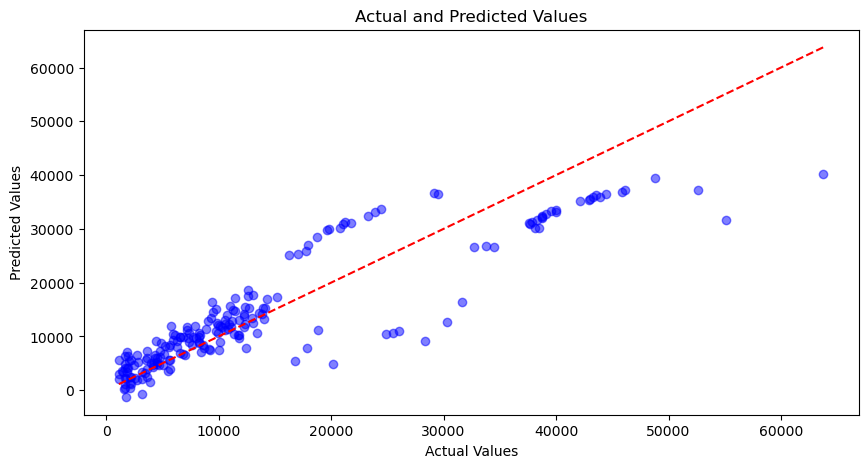

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_linear,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a Random Forest Regressor

In [144]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_rfr))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_rfr))
print('r2_score : ' ,r2_score(y_test,y_pred_rfr))

mean_absolute_error :  2727.5165507606594
mean_squared_error :  23184976.09346825
r2_score :  0.8696623960096903


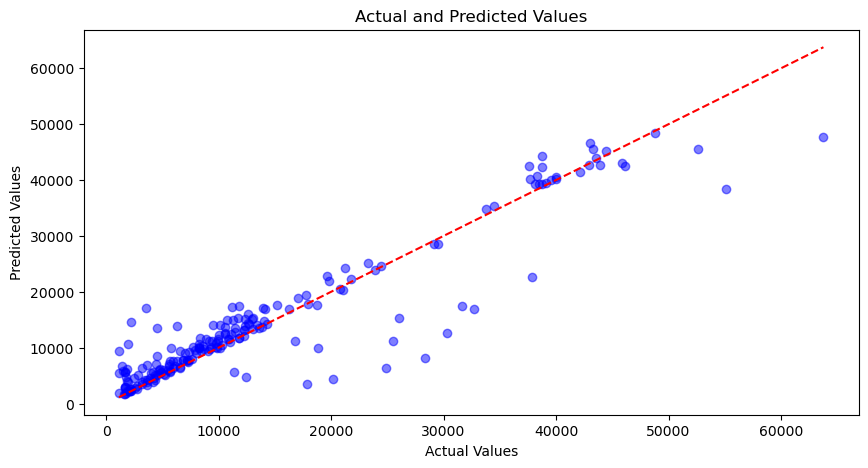

In [145]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_rfr,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a Lasso Regressor

In [146]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_lasso))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_lasso))
print('r2_score : ' ,r2_score(y_test,y_pred_lasso))

mean_absolute_error :  4213.740675419911
mean_squared_error :  35648125.930417724
r2_score :  0.799599046305489


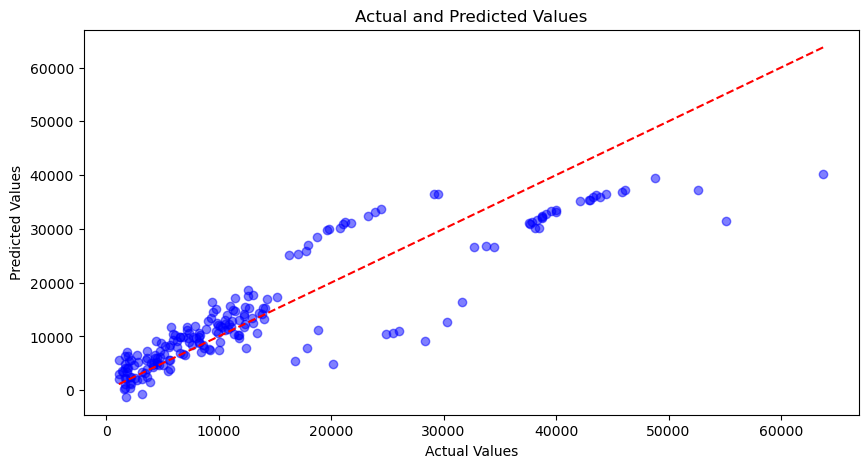

In [147]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_lasso,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a K-Nearest Neighbors

In [149]:
knn=KNeighborsRegressor(n_neighbors=6,metric='minkowski',p=2)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_knn))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_knn))
print('r2_score : ' ,r2_score(y_test,y_pred_knn))

mean_absolute_error :  9154.67688230514
mean_squared_error :  177966450.06109568
r2_score :  -0.00046342933944654163


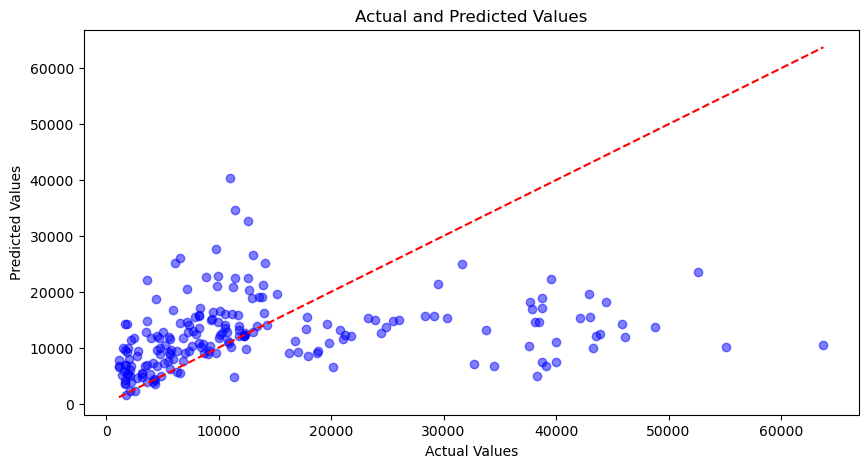

In [151]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_knn,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a Ridge Regression

In [154]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_ridge))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_ridge))
print('r2_score : ' ,r2_score(y_test,y_pred_ridge))

mean_absolute_error :  4228.056172829156
mean_squared_error :  35786245.51415887
r2_score :  0.798822587639481


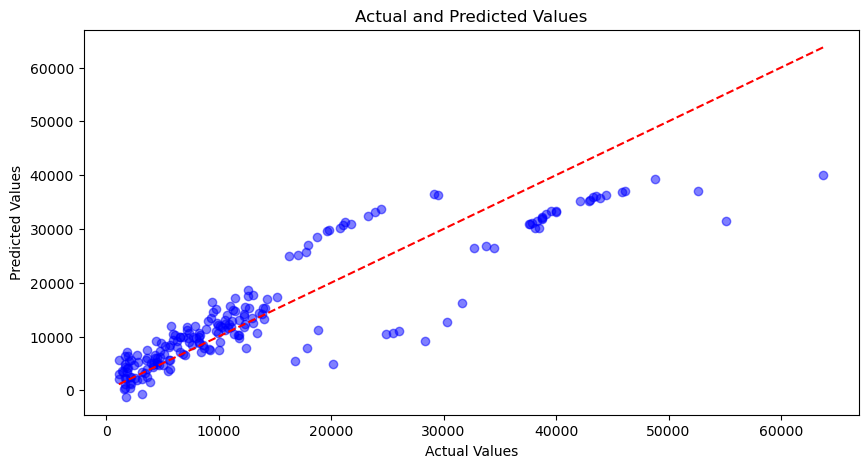

In [156]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_ridge,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a Gradient Boosting Regressor

In [163]:
GBmodel = GradientBoostingRegressor()
GBmodel.fit(x_train,y_train)
y_pred_gb = GBmodel.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_gb))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_gb))
print('r2_score : ' ,r2_score(y_test,y_pred_gb))

mean_absolute_error :  2516.884360620975
mean_squared_error :  18783280.423357584
r2_score :  0.8944071473013844


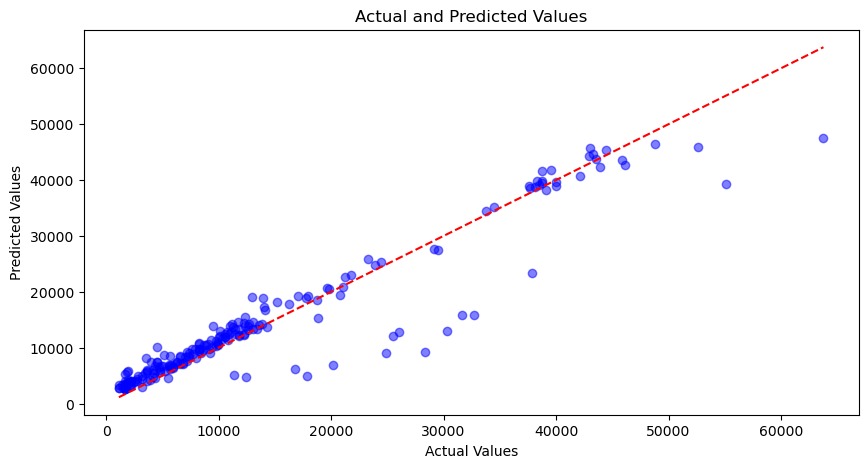

In [165]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_gb,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Determining best Model

In [173]:
results = {
    "Model": ["Linear Regression", "Random Forest", "Lasso", "KNN", "Ridge", "Gradient Boosting"],
    "MAE": [mean_absolute_error(y_test,y_pred_linear), mean_absolute_error(y_test,y_pred_rfr), mean_absolute_error(y_test,y_pred_lasso), mean_absolute_error(y_test,y_pred_knn), mean_absolute_error(y_test,y_pred_ridge), mean_absolute_error(y_test,y_pred_gb)],
    "RMSE": [mean_squared_error(y_test,y_pred_linear), mean_squared_error(y_test,y_pred_rfr), mean_squared_error(y_test,y_pred_lasso), mean_squared_error(y_test,y_pred_knn), mean_squared_error(y_test,y_pred_ridge), mean_squared_error(y_test,y_pred_gb)],
    "R2": [r2_score(y_test,y_pred_linear), r2_score(y_test,y_pred_rfr), r2_score(y_test,y_pred_lasso), r2_score(y_test,y_pred_knn), r2_score(y_test,y_pred_ridge), r2_score(y_test,y_pred_gb)]
}

comparison_df = pd.DataFrame(results)
display(comparison_df.sort_values(by="RMSE"))

,Model,MAE,RMSE,R2
5,Gradient Boosting,2516.884361,1.878328e+07,0.894407
1,Random Forest,2727.516551,2.318498e+07,0.869662
0,Linear Regression,4213.091500,3.564322e+07,0.799627
2,Lasso,4213.740675,3.564813e+07,0.799599
4,Ridge,4228.056173,3.578625e+07,0.798823
3,KNN,9154.676882,1.779665e+08,-0.000463


Among all the models tested, the Gradient Boosting Regressor demonstrated the best performance in predicting individual medical costs based on household characteristics. It achieved the lowest Mean Absolute Error (MAE) of approximately $2,517, indicating the smallest average prediction error across test samples. It also recorded the lowest Root Mean Squared Error (RMSE) and the highest R² score at 0.894, meaning it explains roughly 89.4% of the variability in insurance charges — significantly more than the other models.

Compared to other approaches such as Linear Regression, Ridge, Lasso, and even Random Forests, Gradient Boosting excels by combining multiple weak learners in a sequential way to capture complex, non-linear relationships in the data. This makes it especially effective for modeling real-world data like insurance costs, which are influenced by interactions between features such as age, BMI, and smoking status.

Therefore, Gradient Boosting is the most accurate and robust model for this problem, making it the optimal choice for identifying which individuals are likely to increase or decrease cost to the insurance company.

## Answering the Final Questions. 

The orginal question was- 
1. Can basic household characteristics (age, sex, body mass index, number of dependents covered by insurance, smoking status, and the region where the individual resides) be used to predict the medical cost to the insurance company?
  We now know that household characteristics can be used to predict medial cost well because of the high R² Score (0.894) and low mean absolute error and mean squared error → Your model makes accurate predictions.

  
2. If so, which individuals would increase the cost to the insurance company, and which individuals would decrease the cost to the insurance company?

   To Answer this questions I will analyze feature importances and then interpret how each one influences predictions.

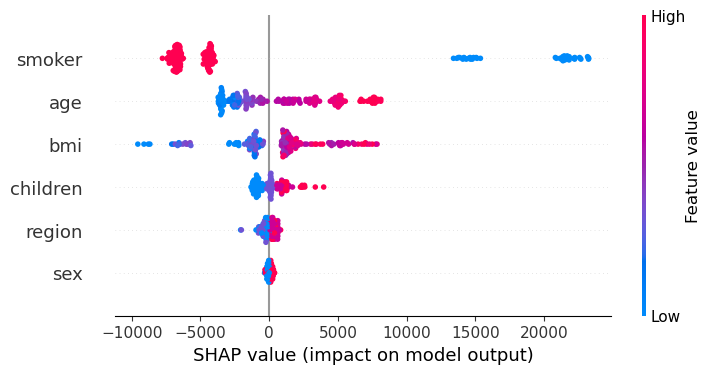

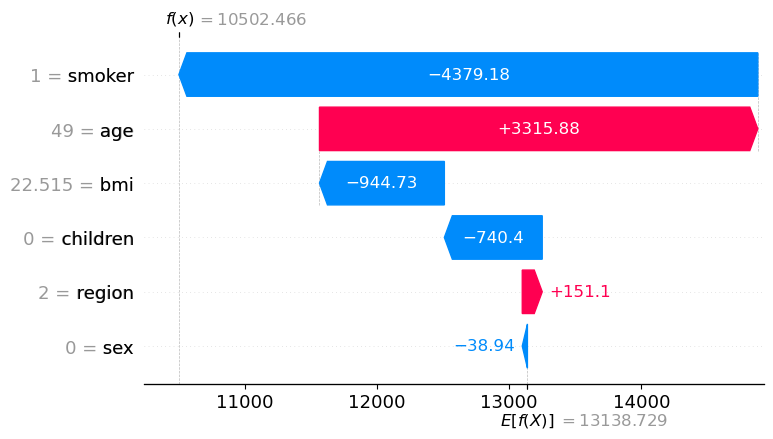

In [188]:
explainer = shap.Explainer(GBmodel, x_train)
shap_values = explainer(x_test)
shap.plots.beeswarm(shap_values)  
shap.plots.waterfall(shap_values[0])

From the plots we can determine that being a smoker, age, and BMI have the greatest effect on the cost to the insurance company. High values of these features—such as being a smoker, older age, or having a high BMI—consistently increase predicted insurance costs. In contrast, individuals who are younger, non-smokers, or have a lower BMI are more likely to have reduced cost predictions. Other features like number of children, region, and sex have relatively minimal impact on cost predictions according to the model.

So for a Male that at the age of 49, is a smoker, has a BMI of 22.5, with no children, in the Northeast region has an average predicted cost of approximately $13,062. The largest positive driver was age (49), which significantly increased the predicted cost. In contrast, their non-obese BMI, lack of dependents, and the specific region and sex contributed to a lower cost prediction. The model also showed a large negative contribution from smoking status, which is counterintuitive and may require verification of how that feature was encoded (e.g., 1 = no instead of 1 = yes).